In [1]:
#show plots in the notebook
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm, neighbors, linear_model, grid_search

# The digits dataset
digits = datasets.load_digits()

print ("Digits data set, data shape = ", digits.data.shape)
print(digits.data)

('Digits data set, data shape = ', (1797L, 64L))
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


('first item as 8x8 array - represents value ', 0)


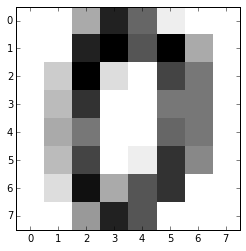

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [2]:
print ("first item as 8x8 array - represents value ", digits.target[0])
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# to see the array
digits.images[0]

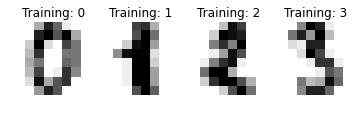

In [3]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
# Create a classifier: a support vector classifier
#classifier = svm.SVC(gamma=0.001)
classifier = neighbors.KNeighborsClassifier()
#classifier = linear_model.LogisticRegression()

parameters = {'n_neighbors': [1,10,100]}
score = 'accuracy'
clf = grid_search.GridSearchCV(classifier, parameters, scoring = score)
clf.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# We learn the digits on the first half of the digits
#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, score_func=None, scoring='accuracy', verbose=0)

In [17]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
#predicted = classifier.predict(data[n_samples / 2:])
#predicted = clf.predict(data[n_samples / 2:])

y_true, y_pred = expected, clf.predict(data[n_samples/2:])


In [18]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_true, y_pred)))

Classification report for classifier GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, score_func=None, scoring='accuracy', verbose=0):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        88
          1       0.96      0.97      0.96        91
          2       0.99      0.97      0.98        86
          3       0.91      0.92      0.92        91
          4       0.99      0.95      0.97        92
          5       0.96      0.98      0.97        91
          6       0.99      1.00      0.99        91
          7       0.99      0.99      0.99        89
          8       0.94      0.92      0.93        88
          9       0.91      

In [19]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  2  0  0  0  0 81  1]
 [ 0  0  0  4  0  2  0  0  0 86]]


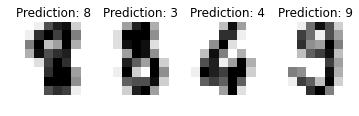

In [20]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()